In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
%matplotlib inline

In [84]:
import tensorflow as tf
from tensorflow.keras.applications import inception_v3, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from helper.metric import f1_m, recall_m, precision_m

In [85]:
#Hyperparameter Initiate
epochs = 50
lr = 1e-3
batch_size = 128
data = []
labels = []

In [86]:
size = 224  # height / with

## Image Data Generator

In [87]:
train_datagen = ImageDataGenerator(horizontal_flip=True,  # Add horizontal flip
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1 / 255)  # change pixel from 0..255 into True or False (1/0)

In [88]:
test_gen = ImageDataGenerator(rescale=1 / 255)

In [89]:
target_size = (size, size)

In [90]:
train_generator = train_datagen.flow_from_directory(
    directory='../data/clean',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2273 images belonging to 2 classes.


In [91]:
validation_generator = test_gen.flow_from_directory(
    directory='../data/clean',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2273 images belonging to 2 classes.


In [92]:
x, y = train_generator.next()
test_X, test_y = validation_generator.next()

## Build ML model

In [93]:
model = Sequential()
model.add(InceptionV3(include_top=False, pooling='avg', weights='imagenet'))
model.add(Flatten())

model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [94]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_288 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
batch_normalization_289 (Bat (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_290 (Bat (None, 1024)             

In [95]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])

In [96]:
checkpoint_path = "../model/sequence/"
checkpoint_dir = os.path.dirname(checkpoint_path)

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator.filenames) // batch_size)


Epoch 1/50
17/17 [==============================] - 125s 7s/step - loss: 1.0808 - accuracy: 0.7403 - f1_m: 0.7041 - precision_m: 0.6691 - recall_m: 0.7482 - val_loss: 0.3610 - val_accuracy: 0.8557 - val_f1_m: 0.8407 - val_precision_m: 0.7665 - val_recall_m: 0.9319

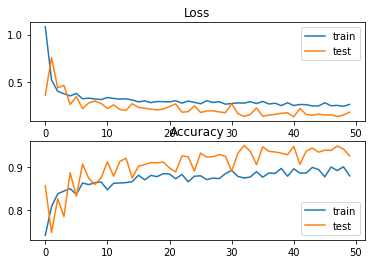

In [97]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [115]:

loss, accuracy, f1_score, precision, recall = model.evaluate(test_X, test_y, verbose=0)

print("loss value {}".format(loss))
print("accuracy value {}".format(accuracy))
print("f1_score value {}".format(f1_score))
print("precision value {}".format(precision))
print("recall value {}".format(recall))

loss value 0.1417805701494217
accuracy value 0.9296875
f1_score value 0.8955568671226501
precision value 0.9772727489471436
recall value 0.8306915760040283


UsageError: Line magic function `%##` not found.


In [117]:
model.save(checkpoint_path + "gender_classification_model.h5")

## Test Model

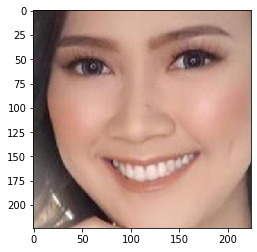

In [150]:
img_path = '../data/clean/female/0_0.jpg'
img = load_img(img_path, target_size=(size, size, 3))
plt.imshow(img)

In [151]:
img = img_to_array(img)
img

array([[[ 60.,  56.,  57.],
        [ 60.,  56.,  57.],
        [ 59.,  55.,  56.],
        ...,
        [164., 129., 110.],
        [157., 122., 103.],
        [138., 110.,  98.]],

       [[ 59.,  55.,  56.],
        [ 59.,  55.,  56.],
        [ 58.,  54.,  55.],
        ...,
        [166., 131., 112.],
        [160., 125., 106.],
        [145., 117., 105.]],

       [[ 58.,  54.,  55.],
        [ 58.,  54.,  55.],
        [ 57.,  53.,  54.],
        ...,
        [167., 132., 113.],
        [162., 127., 108.],
        [148., 118., 107.]],

       ...,

       [[189., 174., 155.],
        [197., 180., 162.],
        [200., 183., 165.],
        ...,
        [145., 108., 100.],
        [140., 103.,  97.],
        [123.,  92.,  87.]],

       [[189., 174., 155.],
        [193., 178., 159.],
        [195., 178., 160.],
        ...,
        [144., 107.,  99.],
        [140., 103.,  97.],
        [128.,  95.,  90.]],

       [[183., 173., 161.],
        [180., 170., 158.],
        [179., 1

In [154]:
img = img / 255
img.shape

(224, 224, 3)

In [156]:
img = img.reshape(1, size, size, 3)

(1, 224, 224, 3)


In [127]:
model.predict(img)

array([[0.00222826]], dtype=float32)

In [128]:
def get_classes(target):
    prob = model.predict(target)
    pred = np.argmax(prob, axis=1)

    if pred[0] == 0:
        return "female"
    else:
        return "male"

In [143]:
get_classes(img)

'female'

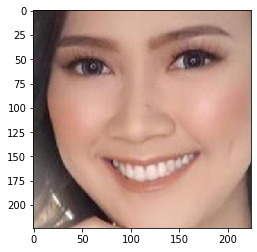

In [144]:
img = load_img(img_path, target_size=(size, size, 3))
plt.imshow(img)
